# data set load & EDA

In [1]:
DATADIR = "dataset/"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Missing colon in file WindowsPath('C:/Users/medici/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 409 (' use Unicode for the minus symbol rather than hyphen.  See')


In [2]:
import os

In [3]:
os.getcwd()

'C:\\jupyter\\ML\\heart-disease'

In [4]:
base_df = pd.read_csv(DATADIR+"merged_base.csv")
follow_df = pd.read_csv(DATADIR+"merged_follow.csv")
base_cols = pd.read_csv(DATADIR+"base_colnames.csv")

In [5]:
base_ID = base_df["T_ID"]
# base_DCLASS = base_df["T_DATA_CLASS"]
base_df = base_df.drop(columns = ["T_ID","T_DATA_CLASS"])

In [6]:
base_cols

,tablename,class,colnames,coltype,ordinalTrue
0,BASE_DATA1,기본정보,T_ID,NaN,NaN
1,BASE_DATA1,기본정보,T_DATA_CLASS,범주형,0
2,BASE_DATA1,기본정보,T_EDATE,연속형,연속형
3,BASE_DATA1,기본정보,T_SEX,범주형,0
4,BASE_DATA1,기본정보,T_AGE,연속형,연속형
...,...,...,...,...,...
56,BASE_DATA3,임상검사,T_HDL,연속형,연속형
57,BASE_DATA3,임상검사,T_LDL,연속형,연속형
58,BASE_DATA3,임상검사,T_TG,연속형,연속형
59,BASE_NONE,미상,T_PACKYR,연속형,연속형


In [7]:
base_cols.drop(index=[0,1],inplace=True)

In [8]:
base_df

,T_EDATE,T_SEX,T_AGE,T_INCOME,T_MARRY,T_HTN,T_HTNAG,T_DM,T_DMAG,T_LIP,...,T_BMI,T_HBA1C,T_GLU0,T_CREATINE,T_AST,T_ALT,T_TCHL,T_HDL,T_LDL,T_TG
0,200802,2,42,99999,99999,1,77777,1,77777,2,...,24,66666.0,68,0.60,20,12,172,62,102,38
1,200306,2,58,1,2,2,50,1,77777,1,...,26,66666.0,86,0.60,17,13,197,62,119,79
2,201108,2,60,99999,2,2,50,1,77777,2,...,23,66666.0,86,0.80,39,53,156,46,88,112
3,201004,2,73,1,5,2,63,1,77777,1,...,27,66666.0,108,0.76,16,28,170,39,109,109
4,200410,2,59,2,2,1,77777,1,77777,1,...,27,66666.0,91,0.68,18,13,178,65,103,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,201003,1,66,3,2,1,77777,1,77777,1,...,23,66666.0,93,0.90,25,25,149,53,85,53
9996,200510,1,58,7,2,2,58,2,48,1,...,25,66666.0,120,0.70,19,16,159,39,101,93
9997,201107,1,57,5,2,1,77777,1,77777,1,...,23,66666.0,86,1.40,22,28,188,34,76,389
9998,201108,2,43,7,2,1,77777,1,77777,1,...,24,66666.0,104,0.80,37,46,200,63,126,54


In [9]:
base_df[["T_DM"]].value_counts()

T_DM 
1        9269
2         712
99999      19
dtype: int64

In [10]:
base_df[["T_INCOME"]].value_counts()

T_INCOME
5           1716
6           1472
7           1152
99999       1139
4            897
66666        873
3            804
1            729
2            632
8            586
dtype: int64

In [11]:
base_cols[base_cols["class"]=="임상검사"]

,tablename,class,colnames,coltype,ordinalTrue
42,BASE_DATA3,임상검사,T_SBP,연속형,연속형
43,BASE_DATA3,임상검사,T_DBP,연속형,연속형
44,BASE_DATA3,임상검사,T_PULSE,연속형,연속형
45,BASE_DATA3,임상검사,T_WAIST,연속형,연속형
46,BASE_DATA3,임상검사,T_HIP,연속형,연속형
47,BASE_DATA3,임상검사,T_HEIGHT,연속형,연속형
48,BASE_DATA3,임상검사,T_WEIGHT,연속형,연속형
49,BASE_DATA3,임상검사,T_BMI,연속형,연속형
50,BASE_DATA3,임상검사,T_HBA1C,연속형,연속형
51,BASE_DATA3,임상검사,T_GLU0,연속형,연속형


- 설명이 없는 2가지 변수 발견
    - T_PACKYR
    - T_TOTALC
- base_none , 미상 으로 추가 (base_colnames.csv 파일에)

# 인코딩

## 척도 분리 (범주형 - 순위 / 명목)

In [12]:
base_cols[base_cols["coltype"]=="범주형"].head()

,tablename,class,colnames,coltype,ordinalTrue
3,BASE_DATA1,기본정보,T_SEX,범주형,0
5,BASE_DATA1,일반정보,T_INCOME,범주형,1
6,BASE_DATA1,일반정보,T_MARRY,범주형,0
7,BASE_DATA2,과거력,T_HTN,범주형,0
9,BASE_DATA2,과거력,T_DM,범주형,1


## 그룹별 cols 묶기

In [13]:
lifestyle_cols = base_cols[base_cols["class"]=="생활습관"]["colnames"]
female_cols = base_cols[base_cols["class"]=="여성력"]["colnames"]
history_cols = base_cols[base_cols["class"]=="과거력"]["colnames"]
family_cols = base_cols[base_cols["class"]=="가족력"]["colnames"]
start_cols = base_cols[(base_cols["class"]=="기본정보") | (base_cols["class"]=="일반정보")]["colnames"]


In [14]:
used_cols = pd.Series(["T_HEIGHT", "T_WEIGHT","T_BMI"])
target_cols = pd.Series(["T_DM","T_GLU0"])

### 사용할 col (start_cols) 지정

- 사용 안하는 col
    - ID
    - T_DATA_CLASS : 조사단위, 시간 EDATE와 의미가 중복됨

In [15]:
start_cols = start_cols.append([used_cols,target_cols,lifestyle_cols]).reset_index(drop=True)
start_cols.drop(index = [0,1],inplace=True) # "T_ID", "T_DATA_CLASS" drop
len(start_cols)

28

### 4가지 척도로 변수 분류(범주형, 순서형, 이산형, 연속형)

In [16]:
categori_cols = base_cols[base_cols["coltype"]=="범주형"]["colnames"]
continous_cols = base_cols[base_cols["coltype"]=="연속형"]["colnames"]

In [17]:
categori_cols.shape, continous_cols.shape

((23,), (36,))

#### 이산형 변수 형변환 (float64 -> int64)

- 자료형 변환
- 반올림

- 1.8잔을 2잔으로 반올림해도 성능에 유의미한 변화 없을것
- 숫자형 변수의 전부 이산형 
    - ex. 와인 1잔, 2잔 ...
- 연속형 변수는 임상시험에 몰려 있음 
    - ex. 공복혈당 126.6 mg/dL

In [18]:
import copy
data1 = copy.deepcopy(base_df)

In [19]:
data1[continous_cols].dtypes.value_counts()

int64      24
float64    12
dtype: int64

In [20]:
data1[continous_cols] = data1[continous_cols].astype("int64")

In [21]:
data1[continous_cols].dtypes.value_counts()

int64    36
dtype: int64

In [22]:
data1.head()

,T_EDATE,T_SEX,T_AGE,T_INCOME,T_MARRY,T_HTN,T_HTNAG,T_DM,T_DMAG,T_LIP,...,T_BMI,T_HBA1C,T_GLU0,T_CREATINE,T_AST,T_ALT,T_TCHL,T_HDL,T_LDL,T_TG
0,200802,2,42,99999,99999,1,77777,1,77777,2,...,24,66666,68,0,20,12,172,62,102,38
1,200306,2,58,1,2,2,50,1,77777,1,...,26,66666,86,0,17,13,197,62,119,79
2,201108,2,60,99999,2,2,50,1,77777,2,...,23,66666,86,0,39,53,156,46,88,112
3,201004,2,73,1,5,2,63,1,77777,1,...,27,66666,108,0,16,28,170,39,109,109
4,200410,2,59,2,2,1,77777,1,77777,1,...,27,66666,91,0,18,13,178,65,103,52


In [23]:
data1.shape

(10000, 59)

In [24]:
len(categori_cols) + len(continous_cols),len(data1.columns)

(59, 59)

## 척도별 결측치 채우기

- 범주형 변수 -> 최빈값(mode)으로 결측치 채우기
- ordialTrue == 1 : 순서형
    - OrdinalEncoding  : (숫자형 : 방치) / (object형 : LabelEncoding)
- ordialTrue == 0 : 명목형
    - OneHotEncoder

In [25]:
from sklearn.impute import SimpleImputer

### 의미상 결측치 -> None 으로 대체!

'미상/무응답’, ‘설문 문항 간의 상·하위 관계(해당없음)’, ‘해당변수의 조사유무
(조사안함)

- 66666: (조사안함)특정 조사단위에 조사되지 않은 항목의 경우; 
- 77777: 조사항목에 대해 응답의 대상이 아닌 경우 ; 
- 99999: 미상/무응답

### 해당없음(77777) -> 0으로 채우기

- 귀하는 병·의원에서 의사로부터 고혈압으로 진단받은 적이 있습니까?
    - 있으면 7-1번으로
    - 없으면 8번으로
    

In [26]:
data1.replace(dict.fromkeys([77777.0],0),inplace=True)
data1.replace(dict.fromkeys([77777],0),inplace=True)

### 나머지([66666.0,66666,55555.0,55555,99999.0,99999]) -> None

In [28]:
base_na = data1.replace(dict.fromkeys([66666.0,66666,55555.0,55555,99999.0,99999],None))

In [53]:
import missingno as msno

<AxesSubplot:>

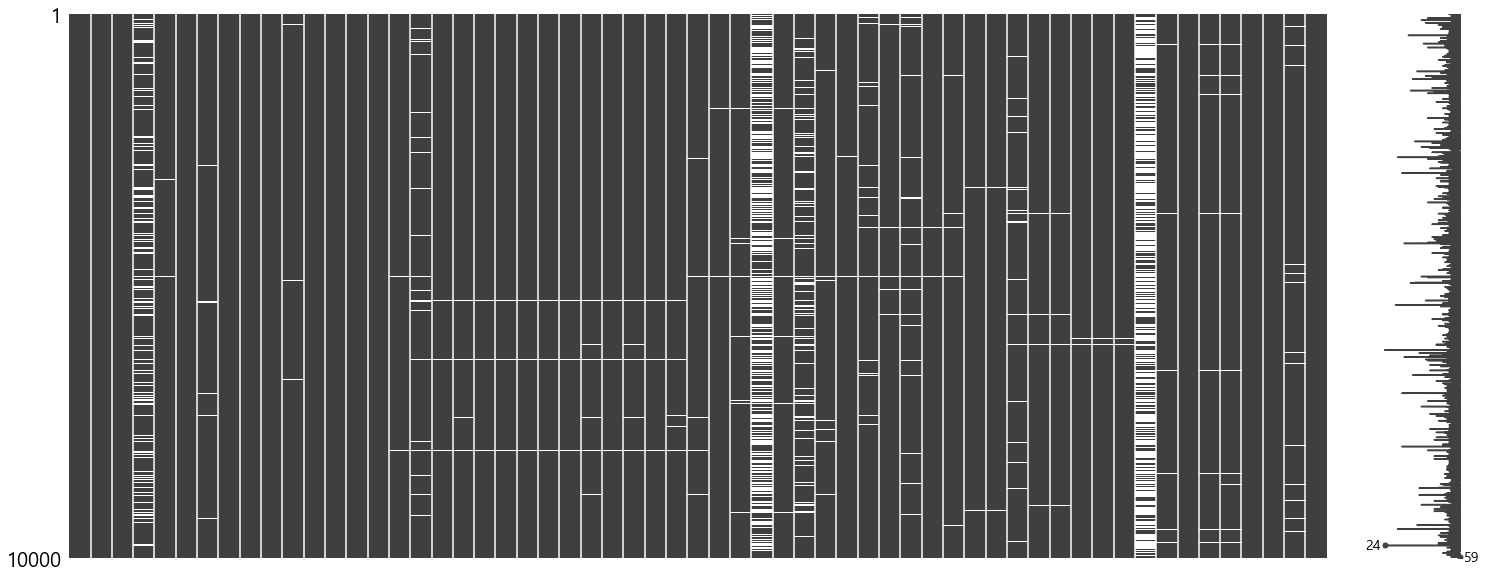

In [55]:
msno.matrix(base_na)

In [83]:
nasort = base_na.isna().sum().argsort()[::-1]
base_na.isna().sum()[nasort].head()

T_HBA1C     6235
T_SMDUMO    4781
T_INCOME    2012
T_PACKYR    1289
T_PULSE      445
dtype: int64

In [52]:
sorted(base_na.isna().sum() / 10000,reverse=True)[:5]

[0.6235, 0.4781, 0.2012, 0.1289, 0.0445]

In [28]:
base_na.isnull().sum().sum()

18951

In [ ]:
base_na["T_BEERAM"].value_counts()

### 결측치 채우기 - Imputer

극단값이 많은 의료 데이터 셋이므로
- 숫자형 변수 : 중앙값으로 대체
- 범주형 변수 : 최빈값으로 대체

In [86]:
imputers = []
for col in base_na.columns:
    if col in categori_cols.to_list():
        imputer = SimpleImputer(strategy="most_frequent") 
    elif col in continous_cols:
        imputer = SimpleImputer(strategy="median")               
    else : pass
    imputer.fit(base_na[col].values.reshape(-1,1))
    base_na[col] = imputer.transform(base_na[col].values.reshape(-1,1))
    imputers.append(imputer)
base_na.isna().sum().sum()

0

In [87]:
base_na["T_BEERAM"].value_counts().head(10)

0.0     7982
2.0      671
1.0      353
3.0      327
5.0      321
4.0       94
10.0      68
7.0       54
6.0       43
8.0       25
Name: T_BEERAM, dtype: int64

In [88]:
base_na["T_HBA1C"].value_counts().head(10)

5.0     9167
6.0      520
4.0      118
7.0      109
8.0       45
9.0       16
10.0      10
11.0       6
3.0        4
13.0       3
Name: T_HBA1C, dtype: int64

In [89]:
base_na["T_SMDUMO"].value_counts().head(10)

0.0     9933
6.0       21
10.0       8
5.0        6
11.0       6
7.0        5
1.0        5
2.0        4
9.0        4
4.0        3
Name: T_SMDUMO, dtype: int64

## 순서형 변수 인코딩

In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

- 이미 순서의 의미를 갖으므로 pass / 1=5년이하,
2=6-10년,
3=11-20년,
4=21년 이상


In [153]:
base_cols["coltype"].value_counts()

연속형    36
범주형    24
Name: coltype, dtype: int64

In [157]:
# fig = plt.figure(figsize = (30, 30))
# sns.pairplot(base_na[start_cols])
# plt.show()

In [ ]:
break MICE

# 결측치 채우기 - MICE

In [29]:
input_df = base_na[start_cols]
input_df["T_DM"].replace({1.0 : 0},inplace=True)
input_df["T_DM"].replace({2.0 : 1},inplace=True)
mice_df_na = copy.deepcopy(input_df)

In [30]:
input_df["T_DM"].value_counts()

0.0    9269
1.0     712
Name: T_DM, dtype: int64

In [31]:
# 변환전
mice_df_na.shape

(10000, 28)

In [32]:
mice_df_na.isnull().sum().sum()

8677

In [33]:
#변환
from impyute.imputation.cs import mice
np_imputed=mice(mice_df_na.values) # mice 학습시작

In [34]:
np_imputed.shape

(10000, 28)

In [35]:
df_imputed = pd.DataFrame(np_imputed,columns=mice_df_na.columns)

In [36]:
df_imputed.isnull().sum().sum()

0

In [37]:
df_imputed.head()

,T_AGE,T_INCOME,T_MARRY,T_HEIGHT,T_WEIGHT,T_BMI,T_DM,T_GLU0,T_DRINK,T_DRDU,...,T_BEERFQ,T_BEERAM,T_HLIQFQ,T_HLIQAM,T_SMOKE,T_SMDUYR,T_SMDUMO,T_SMAM,T_PSM,T_EXER
0,42.0,6.387132,1.893766,164.0,64.0,24.0,0.0,68.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.033757,0.0,1.0,2.0
1,58.0,1.000000,2.000000,156.0,64.0,26.0,0.0,86.0,2.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.098561,0.0,2.0,1.0
2,60.0,4.376298,2.000000,154.0,54.0,23.0,0.0,86.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,2.0
3,73.0,1.000000,5.000000,143.0,55.0,27.0,0.0,108.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,2.0
4,59.0,2.000000,2.000000,150.0,60.0,27.0,0.0,91.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,1.0


In [ ]:
# fig = plt.figure(figsize = (30, 30))
# sns.pairplot(df_imputed)
# plt.show()

### MICE 결측치 처리 결과 검증

In [ ]:
# input_df.hist(figsize = (20,20))
# plt.show()

In [ ]:
# df_imputed.hist(figsize = (20,20))
# plt.show()

In [44]:
# 정종 1회 음주량
df_imputed["T_RICEAM"].value_counts() 

 0.000000     9892
 1.000000       17
 2.000000       17
 3.000000       14
 5.000000       10
 10.000000       9
 7.000000        7
 6.000000        5
 4.000000        3
 12.000000       2
 15.000000       2
 0.157417        1
 0.057888        1
 2.012158        1
 0.029938        1
 0.009043        1
-0.003539        1
 6.021441        1
 0.030108        1
 2.041639        1
-0.036365        1
 0.018876        1
 0.138639        1
 2.047351        1
 14.000000       1
 2.048418        1
 2.221227        1
 0.025938        1
 0.186613        1
 1.965153        1
 2.200577        1
 2.059903        1
 0.024484        1
Name: T_RICEAM, dtype: int64

#### 음수 => 0으로 처리

In [45]:
for col in df_imputed:
    df_imputed[df_imputed[col] < 0] = 0 

#### Target class T_DM 확인

In [46]:
df_imputed["T_DM"].value_counts()

0.000000    9277
1.000000     707
0.174930       1
0.115011       1
0.123111       1
0.056079       1
0.072344       1
0.075040       1
0.094938       1
0.054535       1
0.087259       1
0.077637       1
0.028140       1
0.758691       1
0.031687       1
0.063833       1
0.100733       1
0.035835       1
Name: T_DM, dtype: int64

In [47]:
input_df["T_DM"].value_counts()

0.0    9269
1.0     712
Name: T_DM, dtype: int64

In [48]:
input_df["T_DM"].value_counts()
df_imputed["T_DM"].value_counts()

0.000000    9277
1.000000     707
0.174930       1
0.115011       1
0.123111       1
0.056079       1
0.072344       1
0.075040       1
0.094938       1
0.054535       1
0.087259       1
0.077637       1
0.028140       1
0.758691       1
0.031687       1
0.063833       1
0.100733       1
0.035835       1
Name: T_DM, dtype: int64

#### 이산형 float64 -> int64

In [49]:
df_imputed = df_imputed.astype("int64")

In [50]:
imbalanced_cols = []
for col in start_cols.to_list():
    if df_imputed[col].value_counts().iloc[0] > 5000:
        imbalanced_cols.append(col)

In [51]:
balanced_cols = []
for col in df_imputed:
    if col not in imbalanced_cols:
        balanced_cols.append(col)

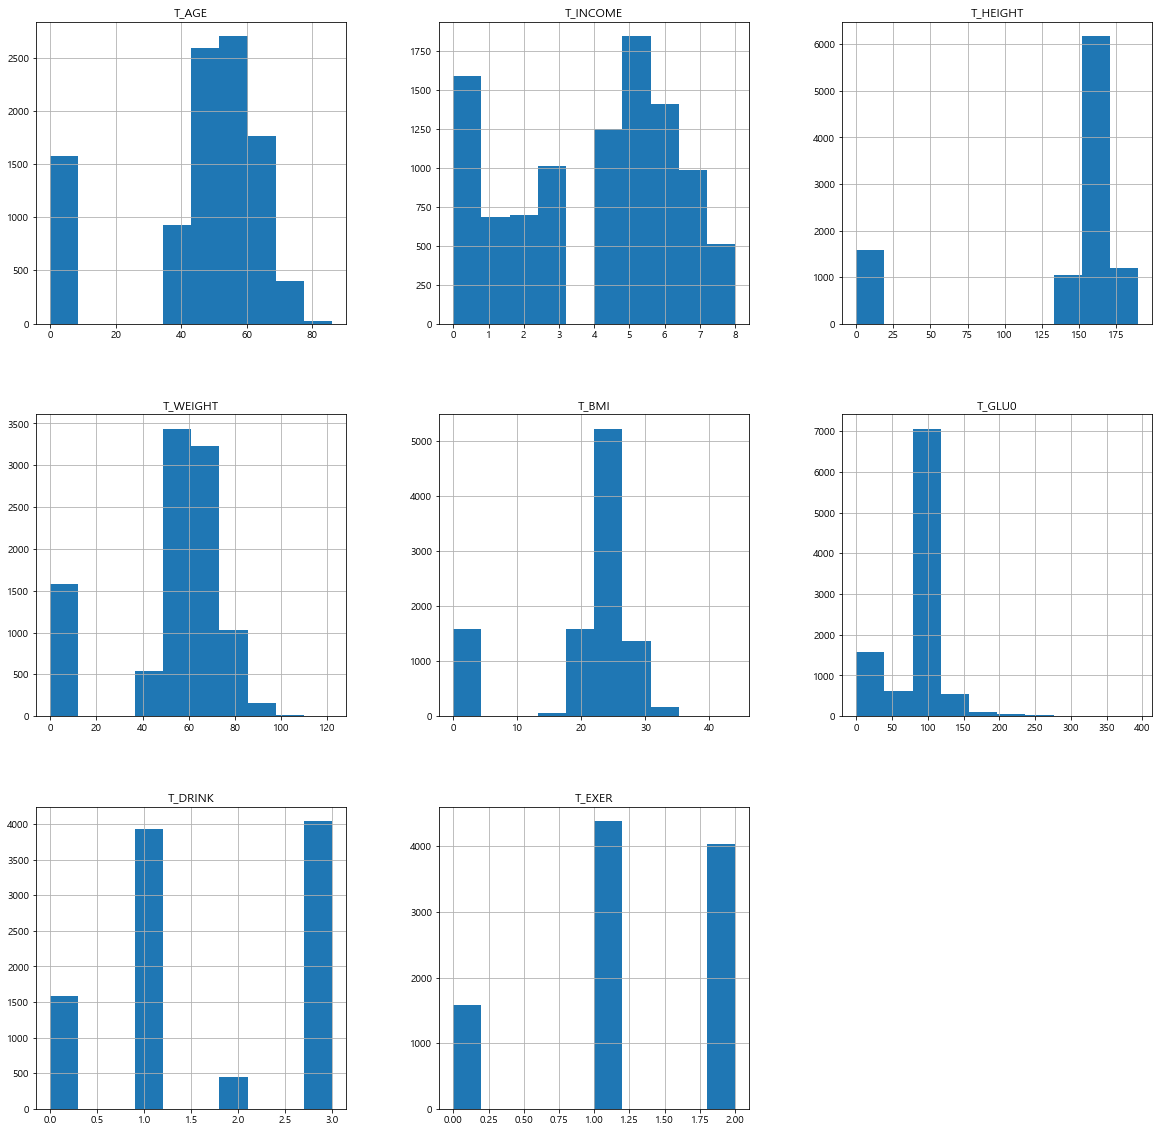

In [52]:
df_imputed[balanced_cols].hist(figsize = (20,20))
plt.show()

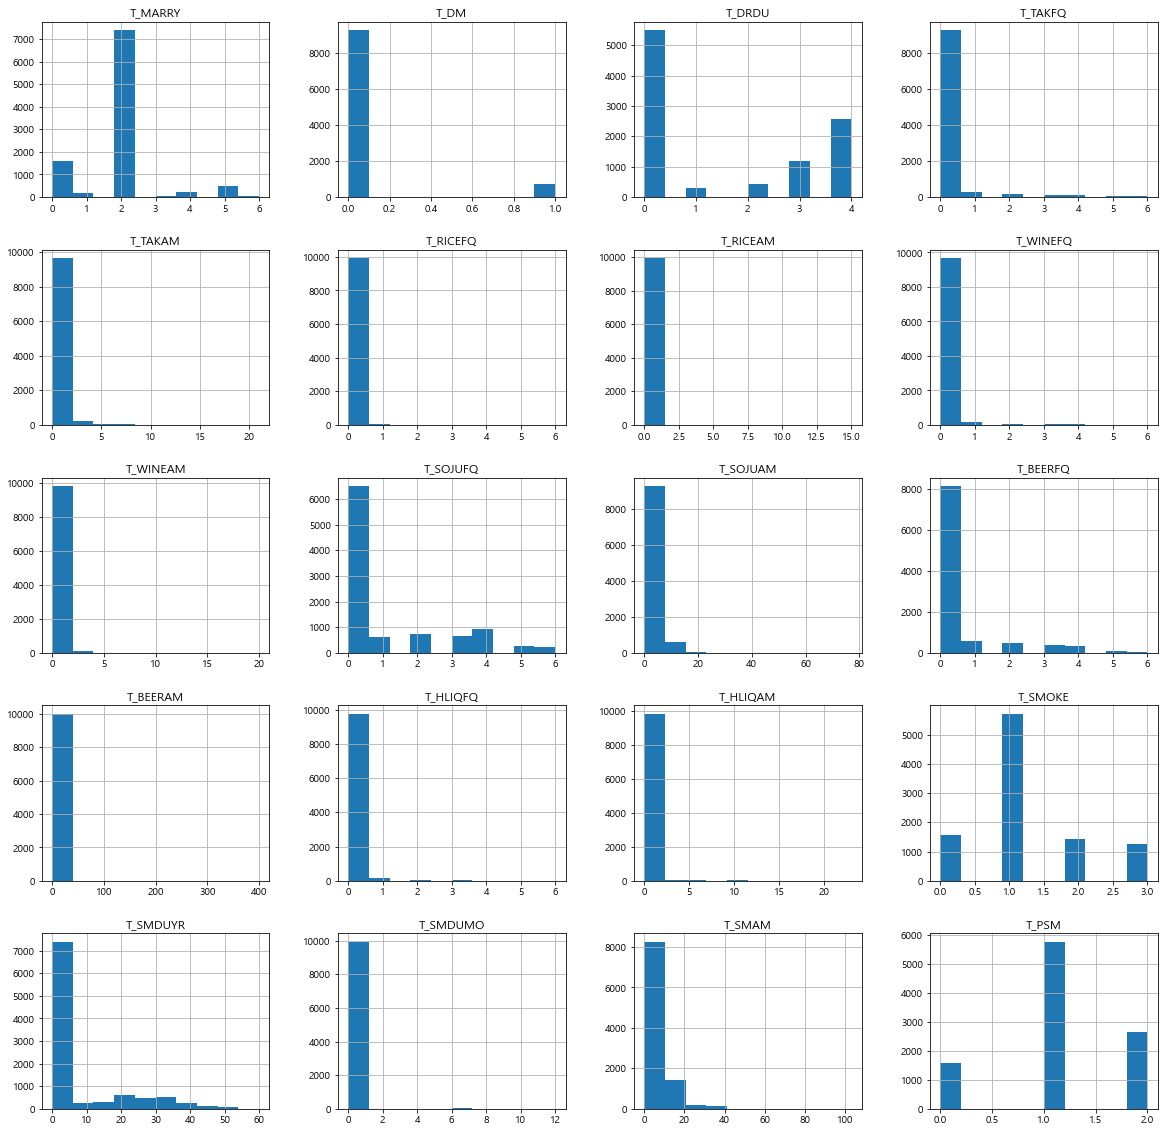

In [53]:
df_imputed[imbalanced_cols].hist(figsize = (20,20))
plt.show()

In [ ]:
df_imputed.to_csv(DATADIR+"perfect_base.csv",index=False)

# second start point

### 결측치 처리한 데이터셋 저장

In [1]:
DATADIR = "dataset/"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Missing colon in file WindowsPath('C:/Users/medici/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 409 (' use Unicode for the minus symbol rather than hyphen.  See')


In [2]:
import copy

In [3]:
snd_dataset = pd.read_csv(DATADIR+"perfect_base.csv")
df_imputed = copy.deepcopy(snd_dataset)

In [4]:
base_cols = pd.read_csv(DATADIR+"base_colnames.csv")
lifestyle_cols = base_cols[base_cols["class"]=="생활습관"]["colnames"]
female_cols = base_cols[base_cols["class"]=="여성력"]["colnames"]
history_cols = base_cols[base_cols["class"]=="과거력"]["colnames"]
family_cols = base_cols[base_cols["class"]=="가족력"]["colnames"]
start_cols = base_cols[(base_cols["class"]=="기본정보") | (base_cols["class"]=="일반정보")]["colnames"]
used_cols = pd.Series(["T_HEIGHT", "T_WEIGHT","T_BMI"])
target_cols = pd.Series(["T_DM","T_GLU0"])

In [5]:
start_cols = start_cols.append([used_cols,target_cols,lifestyle_cols]).reset_index(drop=True)
start_cols.drop(index = [0,1],inplace=True) # "T_ID", "T_DATA_CLASS" drop
len(start_cols)

30

In [6]:
normial_cols = base_cols[base_cols["ordinalTrue"]=="0"]["colnames"]
ordinal_cols = base_cols[base_cols["ordinalTrue"]=="1"]["colnames"]

In [7]:
categori_cols = base_cols[base_cols["coltype"]=="범주형"]["colnames"]
continous_cols = base_cols[base_cols["coltype"]=="연속형"]["colnames"]

In [8]:
binary_cols = []

for col in df_imputed:
    if df_imputed[col].value_counts().index.shape[0] < 3:
        binary_cols.append(col)

In [9]:
start_normial_cols = [] # 명목 척도
start_ordinal_cols = [] # 서열 척도
start_continous_cols = [] # 숫자형(연속형, 이산형)
start_target_cols = [] # 타겟

for col in df_imputed:
    if col in target_cols.to_list():
        start_target_cols.append(col)
    else:
        if col in normial_cols.to_list():
            start_normial_cols.append(col)
        if col in ordinal_cols.to_list():
            start_ordinal_cols.append(col)
        if col in continous_cols.to_list():
            start_continous_cols.append(col)
    

In [10]:
start_target_cols

['T_DM', 'T_GLU0']

In [11]:
df_imputed.shape[1], len(start_normial_cols) + len(start_ordinal_cols) + len(start_continous_cols) + len(start_target_cols)

(28, 28)

## 원핫 인코딩

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe_encoders = []

for col in df_imputed.columns:
    if col not in binary_cols: 
        if col in normial_cols.to_list(): # 명목 척도 -> ohe
            encoder = OneHotEncoder(sparse=False)
            ohe_values = encoder.fit_transform(df_imputed[col].values.reshape(-1,1))
            ohe_df = pd.DataFrame(ohe_values,columns=encoder.get_feature_names(["_"+col]))
            df_imputed.drop(columns=col,inplace=True)
            df_imputed = pd.concat([df_imputed,ohe_df],axis=1)

        else:
            encoder = "non_nomial" # 서열 척도 -> 이미 label 인코딩 된 상태
    else:
        encoder = "binary" # 이진 변수 (클래스 : 0 , 1)는 이미 ohe 처리 된 상태
    ohe_encoders.append([col,encoder])

### 원본 데이터셋과 ohe 결과 비교

In [14]:
snd_dataset.shape, df_imputed.shape

((10000, 28), (10000, 38))

- 28개 -> 38개로 col 증가

# data / target 분리

In [15]:
target_TDM = df_imputed["T_DM"] # 당뇨 진단 
df_imputed.drop(columns = "T_DM", inplace=True)

In [16]:
target_TGLU = df_imputed["T_GLU0"]
df_imputed.drop(columns = "T_GLU0", inplace=True)

In [17]:
df_imputed.shape, target_TDM.shape,target_TGLU.shape

((10000, 36), (10000,), (10000,))

# train / test dataset 분리

In [18]:
from sklearn.model_selection import train_test_split

## 분류 모델(w. T_DM)

In [19]:
target_TDM.value_counts()

0    9293
1     707
Name: T_DM, dtype: int64

- 타겟 분포 유지, 균등 분할

In [21]:
CX_train, CX_test, Cy_train, Cy_test = train_test_split(df_imputed, target_TDM, test_size=0.2, random_state=42,stratify=target_TDM)

In [22]:
Cy_train.value_counts() / sum(Cy_train.value_counts())

0    0.92925
1    0.07075
Name: T_DM, dtype: float64

In [23]:
Cy_test.value_counts() / sum(Cy_test.value_counts())

0    0.9295
1    0.0705
Name: T_DM, dtype: float64

# [함수화]변수 선택 - permutation importance

In [78]:
from sklearn.ensemble import RandomForestClassifier
import eli5 
from eli5.sklearn import PermutationImportance 

def rfr_var_select(X_train, X_test,y_train,y_test):
    rfr_select = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=7, max_features=0.9)
    rfr_select.fit(X_train, y_train)

    perm = PermutationImportance(rfr_select, scoring = "f1", random_state = 42)
    perm.fit(X_test, y_test) 
    
    weights = eli5.show_weights(perm, top = 80, feature_names = X_test.columns.tolist())

    return weights, rfr_select

# 데이터 분포 변환 (정규성)

sol. A : 숫자형 변수 스케일링 (standard / roboust)

- 숫자형 변수의 스케일링을 통해 정규분포의 모양으로 분포를 변경하기
    - standard scaling : 평균 0, 표준편차 1인 표준 정규분포의 형태로 변환
    - Roboust sscaling : 중앙값을 사용해서 극단값에 둔감함.
        - 극단값이 많고, 불균형하기 때문에 Robust를 사용

데이터셋에 Outlier 가 들어있을 때 Robust하게 표준화할 수 있는 방법
중앙값(median)과 IQR(interquartile range) 사용. 
아웃라이어의 영향을 최소화

## [분류] ohe + robust + oversampling

- 중앙값을 사용해서, 극단값에 강한 robust 스케일링!
    - 분포가 불균형하고 극단 값이 많은 데이터셋에 적합

### RobustScaling

In [24]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
robustScaler.fit(CX_train)
Ctrain_data_robustScaled = robustScaler.transform(CX_train)
Ctest_data_robustScaled = robustScaler.transform(CX_test)

In [25]:
Ctrain_data_robustScaled.shape, Ctest_data_robustScaled.shape, Cy_train.shape, Cy_test.shape

((8000, 36), (2000, 36), (8000,), (2000,))

### Oversampling

- oversampling은 train set으로만 진행한다. label은 실제 분포를 유지한다.

- knn 기반 SMOTH 오버샘플링

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
CXtrain_ohe_robust_over,Cytrain_ohe_robust_over= smote.fit_resample(Ctrain_data_robustScaled, Cy_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', Ctrain_data_robustScaled.shape, Cy_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', CXtrain_ohe_robust_over.shape, Cytrain_ohe_robust_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(Cytrain_ohe_robust_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (8000, 36) (8000,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (14868, 36) (14868,)
SMOTE 적용 후 레이블 값 분포: 
 0    7434
1    7434
Name: T_DM, dtype: int64


In [27]:
CXtest_robustScaled_df = pd.DataFrame(Ctest_data_robustScaled, columns =CX_test.columns )

### 변수 선택

In [83]:
w, model = rfr_var_select(CXtrain_ohe_robust_over, CXtest_robustScaled_df, Cytrain_ohe_robust_over, Cy_test)

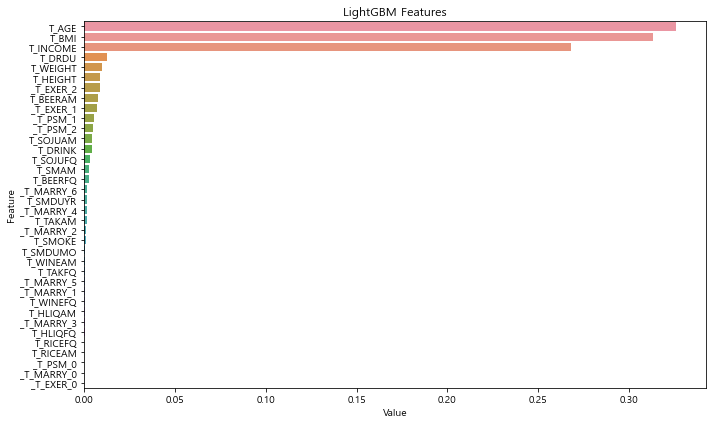

In [84]:
feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, CXtest_robustScaled_df.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [85]:
w 

Weight,Feature
0.0697 ± 0.0444,T_AGE
0.0505 ± 0.0591,T_BMI
0.0265 ± 0.0300,T_INCOME
0.0045 ± 0.0128,T_DRDU
0.0032 ± 0.0024,T_WEIGHT
0.0016 ± 0.0070,T_DRINK
0.0008 ± 0.0011,T_SOJUFQ
0.0004 ± 0.0014,T_BEERFQ
0.0003 ± 0.0029,T_SMAM
0.0002 ± 0.0005,_T_MARRY_1


limit_output extension: Maximum message size of 10000 exceeded with 15636 characters

- 설문 답변의 신뢰성
    - 술 관련 col이 많다 [소주, 맥주, 와인, 막걸리,양주,정종 ] * [1년 평균 섭취 횟수, 1회 음용 횟수]
        - 하지만 중요도가 낮게 나옴
            - 추측 : 술 한잔 -> 사실 많이 먹음
    - 객관적인 지표의 영향력이 크다.
        - 소득, 체중, 나이 등

#### 원본 데이터 셋 , 정확도

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
all_data = copy.deepcopy(snd_dataset)

In [88]:
y_tdm = all_data["T_DM"]
y_T_GLU0 = all_data["T_GLU0"]

all_X = all_data.drop(columns=["T_DM","T_GLU0"])

In [89]:
y_tdm.value_counts()

0    9293
1     707
Name: T_DM, dtype: int64

In [90]:
AX_train, AX_test, Ay_train, Ay_test = train_test_split(all_X, y_tdm, test_size=0.2, random_state=42)

In [91]:
w, model = rfr_var_select(AX_train, AX_test, Ay_train, Ay_test)

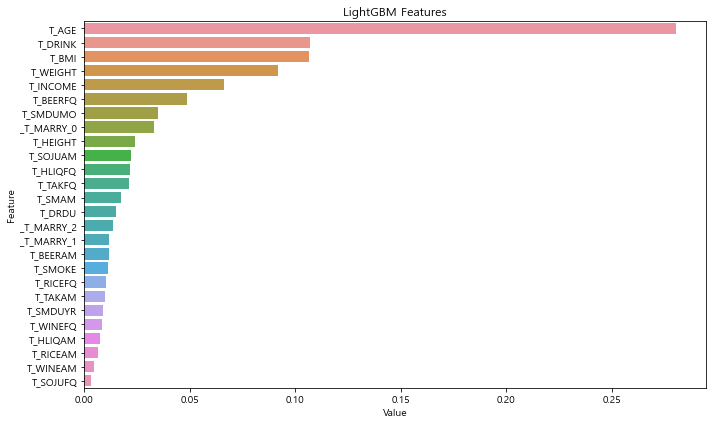

In [93]:
feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, CXtest_robustScaled_df.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

- 기본 모델의 성능이?!

In [92]:
Apred = model.predict(AX_test)
accuracy_score(Ay_test, Apred)

0.9265

In [94]:
AX_train, AX_test, Ay_train, Ay_test = train_test_split(all_X, y_tdm, test_size=0.2, random_state=42,stratify=y_tdm)

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
AX_train_over,Ay_train_over= smote.fit_resample(AX_train, Ay_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', AX_train.shape, Ay_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', AX_train_over.shape, Ay_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(Ay_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (8000, 26) (8000,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (14868, 26) (14868,)
SMOTE 적용 후 레이블 값 분포: 
 0    7434
1    7434
Name: T_DM, dtype: int64


In [96]:
w, model = rfr_var_select(AX_train_over, AX_test, Ay_train_over, Ay_test)

- 오버 샘플링 후 기본모델 정확도

In [98]:
Apred = model.predict(AX_test)
accuracy_score(Ay_test, Apred)

0.698

In [97]:
w

Weight,Feature
0.0282 ± 0.0292,T_AGE
0.0261 ± 0.0151,T_INCOME
0.0237 ± 0.0259,T_DRINK
0.0230 ± 0.0133,T_WEIGHT
0.0208 ± 0.0219,T_PSM
0.0092 ± 0.0041,T_BEERFQ
0.0053 ± 0.0055,T_HEIGHT
0.0046 ± 0.0032,T_BMI
0.0044 ± 0.0029,T_EXER
0.0035 ± 0.0023,T_SOJUFQ


limit_output extension: Maximum message size of 10000 exceeded with 11508 characters

## [분류] robust + LDA + oversampling

- robust O
- ohe X

In [99]:
LDA_data = copy.deepcopy(snd_dataset)

In [100]:
LDA_data.shape

(10000, 28)

In [101]:
LX_train, LX_test, Ly_train, Ly_test = train_test_split(LDA_data, y_tdm, test_size=0.2, random_state=42,stratify=y_tdm)

In [106]:
LX_train.shape

(8000, 28)

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 정규 스케일링
std_scaler = StandardScaler()
std_scaler.fit(LX_train)
std_X_train = std_scaler.transform(LX_train)
std_X_test = std_scaler.transform(LX_test)

# 2개의 클래스로 구분하기 위한 LDA 생성
lda = LinearDiscriminantAnalysis()

# fit()호출 시 target값 입력 
lda.fit(std_X_train,Ly_train)
lda_X_train = lda.transform(std_X_train)
lda_X_test = lda.transform(std_X_test)


In [109]:
lda_X_train.shape, lda_X_test.shape, Ly_train.shape, Ly_test.shape

((8000, 1), (2000, 1), (8000,), (2000,))

In [119]:
lda_df_X_train = pd.DataFrame(lda_X_train,columns=["LDA"])
lda_df_X_test = pd.DataFrame(lda_X_test,columns=["LDA"])


In [120]:
w, model =rfr_var_select(lda_df_X_train, lda_df_X_test, Ly_train, Ly_test)

In [121]:
w

Weight,Feature
0.9433 ± 0.0237,LDA


In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
cross_val_score(model,lda_df_X_test,Ly_test)

array([1., 1., 1., 1., 1.])

# 모델 만들기 (앙상블 -> 메타모델)

## [함수] 모델별 성능 확인 & 시각화

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]
 
def plot_predictions(name_, pred, actual,isgraph = False, target_CR = "C"):
    
    if target_CR == "C":
        df = pd.DataFrame({'prediction': pred, 'actual': Cy_test})
    elif target_CR == "R":
        df = pd.DataFrame({'prediction': pred, 'actual': Ry_test})
    else:
        print("Target Regression? Classification? 다시 입력하시오")
        raise "ERROR"
        
    df = df.sort_values(by='actual').reset_index(drop=True)
    
    if isgraph:
        plt.figure(figsize=(11, 8))
        plt.scatter(df.index, df['prediction'], marker='x', color='r')
        plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
        plt.title(name_, fontsize=15)
        plt.legend(['prediction', 'actual'], fontsize=12)
        plt.show()

def rmse_eval(name_, pred, actual, isgraph = False):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual,isgraph)

    rmse = mean_squared_error(pred, actual,squared=False)
    my_predictions[name_] = rmse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'rmse'])
    print(df)
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10
    
    length = len(df) / 2
    
    
    
    if isgraph:
        plt.figure(figsize=(9, length))
        ax = plt.subplot()
        ax.set_yticks(np.arange(len(df)))
        ax.set_yticklabels(df['model'], fontsize=12)
        bars = ax.barh(np.arange(len(df)), df['rmse'], height=0.3)

        for i, v in enumerate(df['rmse']):
            idx = np.random.choice(len(colors))
            bars[i].set_color(colors[idx])
            ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
        
        plt.title('RMSE Error', fontsize=16)
        plt.xlim(min_, max_)

        plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    rmse = mean_squared_error(pred, actual,squared=False)
    my_predictions[name_] = rmse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual,True)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'rmse'])
    print(df)
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['rmse'], height=0.3)
    
    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('RMSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def acc_eval(name_, pred, actual, isgraph = False):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual,isgraph)

    rmse = accuracy_score(pred, actual)
    my_predictions[name_] = rmse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'accuracy'])
    print(df)
    min_ = df['accuracy'].min() - 10
    max_ = df['accuracy'].max() + 10
    
    length = len(df) / 2
    
    
    
    if isgraph:
        plt.figure(figsize=(9, length))
        ax = plt.subplot()
        ax.set_yticks(np.arange(len(df)))
        ax.set_yticklabels(df['model'], fontsize=12)
        bars = ax.barh(np.arange(len(df)), df['accuracy'], height=0.3)

        for i, v in enumerate(df['accuracy']):
            idx = np.random.choice(len(colors))
            bars[i].set_color(colors[idx])
            ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
        
        plt.title('accuracy', fontsize=16)
        plt.xlim(min_, max_)

        plt.show()

## 모델 학습

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

### [기준]target 기초통계량

<AxesSubplot:>

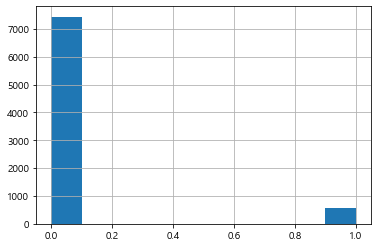

In [127]:
Cy_train.hist()

In [128]:
Cy_train.describe()

count    8000.000000
mean        0.070750
std         0.256423
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: T_DM, dtype: float64

## 하이퍼 파라미터 튜닝

### [함수화] 분류 + ohe + roboust_over

In [129]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB # 이진분류  BernoulliNB, 일반적인 상황 GaussianNB

CXtrain_ohe_robust_over, CXtest_robustScaled_df, Cytrain_ohe_robust_over, Cy_test

CXtrain_robust_over_lda_df, 
                                           CXtest_robust_lda_df, 
                                           CL_y_train_over, 
                                           CLy_test

In [130]:
best_prams = [['LGBMClassifier',
   {'n_estimators': 150, 'max_depth': 30}],
 ['XGBClassifier',
  {'random_state': 2,
   'nthread': 4,
   'n_estimators': 50,
   'min_child_weight': 3,
   'max_depth': 8,
   'gamma': 3,
   'colsample_bytree': 0.5,
   'colsample_bylevel': 0.9,
   'eval_metric': 'logloss'}],
 ['RandomForestClassifier',
  {'random_state' : 42,
    'max_depth': 12,
   'min_samples_leaf': 8,
   'min_samples_split': 8,
   'n_estimators': 100}]]

## lgbm C 튜닝

CXtrain_ohe_robust_over, CXtest_robustScaled_df, Cytrain_ohe_robust_over, Cy_test

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
num_leaves = 2^(max_depth)

In [ ]:
params = {
    'n_estimators': [50,100,150,200], 
    'max_depth': [30,40,50]
}

In [ ]:

clf = RandomizedSearchCV(LGBMClassifier(), params, random_state=42, cv=3, n_iter=25, scoring='neg_mean_squared_error')

clf.fit(CXtrain_ohe_robust_over, Cytrain_ohe_robust_over)

print('최적 하이퍼 파라미터: ', clf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(clf.best_score_))

In [ ]:
best_prams = []

In [ ]:
best_prams.append(["LGBMClassifier",clf.best_params_])

In [ ]:
# {'n_estimators': 150, 'max_depth': 30}
best_lgbmc = LGBMClassifier(**clf.best_params_)

## xgbm 튜닝

In [ ]:
from xgboost import XGBClassifier

params={'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50],
                 'random_state':[2]}

In [ ]:

clf = RandomizedSearchCV(XGBClassifier(eval_metric='logloss'), params, random_state=42, cv=3, n_iter=25, scoring='neg_mean_squared_error')

clf.fit(CXtrain_ohe_robust_over, Cytrain_ohe_robust_over)

print('최적 하이퍼 파라미터: ', clf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(clf.best_score_))

In [ ]:
bestdict = clf.best_params_
bestdict["eval_metric"] = "logloss"

In [ ]:
best_prams.append(["XGBClassifier",bestdict])

In [ ]:
bestdict

In [ ]:
best_XGBc = XGBClassifier(**bestdict)

## rfr c 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(CXtrain_ohe_robust_over, Cytrain_ohe_robust_over)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
best_prams.append(["RandomForestClassifier",grid_cv.best_params_])

In [ ]:
best_prams
best_prams[2][1]["random_state"] = 42

# 재료 모델 학습 시작

# xgb 

In [102]:
accuracy_list = []
model_list = []
model_preds =[]

In [103]:
xgb = XGBClassifier(**best_prams[1][1])
xgb.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
xgb_pred = xgb.predict(CXtest_robustScaled_df)
acc_eval('XGBoost', xgb_pred, Cy_test)
    


     model  accuracy
0  XGBoost    0.9275


In [104]:
model_list.append(xgb)
model_preds.append(xgb_pred)
acc = accuracy_score(Cy_test,xgb_pred)
accuracy_list.append(('XGBClassifier', acc))

# lgbm

In [105]:
#lgb
lgbm = LGBMClassifier(**best_prams[0][1])
lgbm.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
lgbm_pred = lgbm.predict(CXtest_robustScaled_df)
acc_eval('LGBM', lgbm_pred, Cy_test)

     model  accuracy
0  XGBoost    0.9275
1     LGBM    0.9275


In [106]:
model_list.append(lgbm)
model_preds.append(lgbm_pred)
acc = accuracy_score(Cy_test,lgbm_pred)
accuracy_list.append(('LGBMClassifier', acc))

# BernoulliNB

- 나이브베이즈 기반 알고리즘, 이진 분류와 텍스트 처리에 사용됨
- 통계 기반 

In [107]:
# bern
bern = BernoulliNB()
bern.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
bern_pred = bern.predict(CXtest_robustScaled_df)
acc_eval('BernoulliNB', bern_pred, Cy_test)

model_list.append(bern)
model_preds.append(bern_pred)
acc = accuracy_score(Cy_test,bern_pred)
accuracy_list.append(('BernoulliNB', acc))

         model  accuracy
0      XGBoost    0.9275
1         LGBM    0.9275
2  BernoulliNB    0.5465


# RFR

- 과적합에 강한 RandomForest 모델
- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

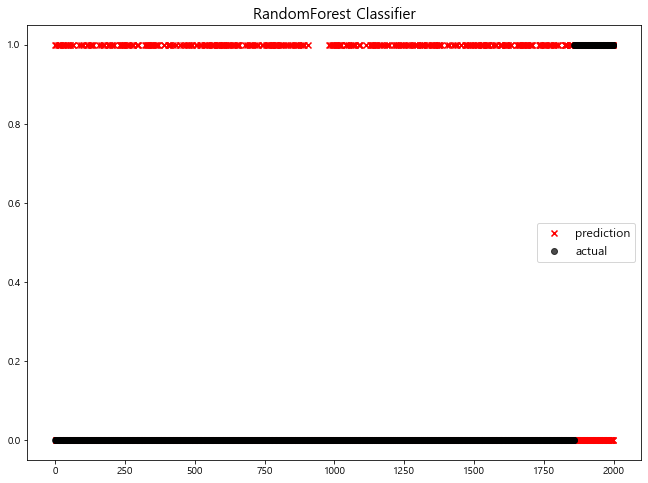

                     model  accuracy
0                  XGBoost    0.9275
1                     LGBM    0.9275
2  RandomForest Classifier    0.7955
3              BernoulliNB    0.5465


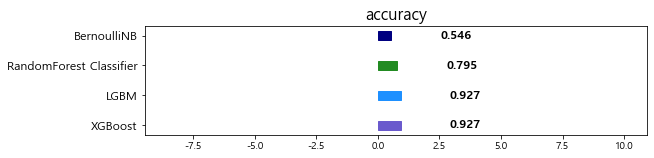

In [108]:
#rfr
rfr = RandomForestClassifier(**best_prams[2][1])
rfr.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
rfr_pred = rfr.predict(CXtest_robustScaled_df)
acc_eval('RandomForest Classifier', rfr_pred, Cy_test,True)


In [109]:
model_list.append(rfr)
model_preds.append(rfr_pred)
acc = accuracy_score(Cy_test,rfr_pred)
accuracy_list.append(('RandomForest Classifier', acc))

# SVC

- 경계 기반 분류

In [110]:
from sklearn.svm import SVC

In [111]:
svc = SVC()
svc.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
svc_pred = svc.predict(CXtest_robustScaled_df)

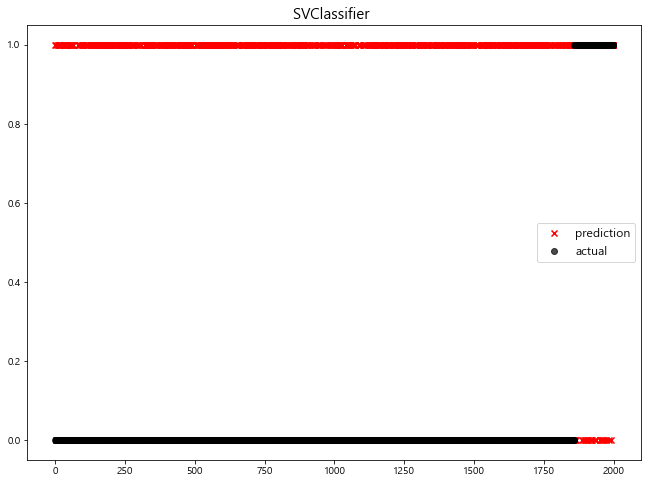

                     model  accuracy
0                  XGBoost    0.9275
1                     LGBM    0.9275
2  RandomForest Classifier    0.7955
3            SVClassifier     0.6350
4              BernoulliNB    0.5465


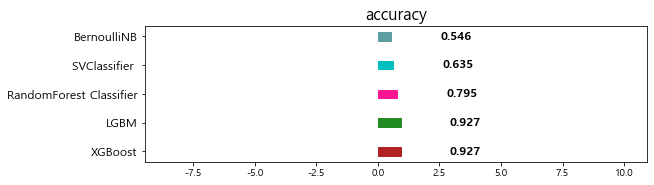

In [112]:
acc_eval('SVClassifier ', svc_pred, Cy_test,True)

In [113]:
model_list.append(svc)
model_preds.append(svc_pred)
acc = accuracy_score(Cy_test,svc_pred)
accuracy_list.append(('SVClassifier', acc))

# voting classifier

- 다수결로 결정하는 Voting 방식

In [114]:
from sklearn.ensemble import VotingClassifier

In [115]:
voting_models = []
for model in model_list:
    voting_models.append((model.__class__.__name__, model))

In [116]:
# voting_Classifier.fit(CXtrain_robust_over_lda_df,CL_y_train_over)
voting_Classifier = VotingClassifier(voting_models, n_jobs=-1)
voting_Classifier.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)


VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=0.9,
                                            colsample_bynode=1,
                                            colsample_bytree=0.5,
                                            enable_categorical=False,
                                            eval_metric='logloss', gamma=3,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=8,
                                            min_child_weight=3, missing=n...
                                            reg_alpha=0, reg_lambda=1,
                                            scale_pos_weight=1, subsample=1,
            

In [117]:
voting_pred = voting_Classifier.predict(CXtest_robustScaled_df)

In [118]:
model_list.append(voting_Classifier)
model_preds.append(voting_pred)


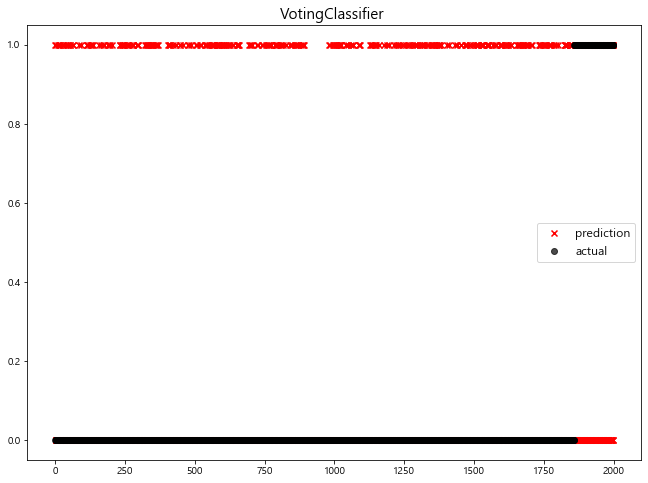

                     model  accuracy
0                  XGBoost    0.9275
1                     LGBM    0.9275
2        VotingClassifier     0.8190
3  RandomForest Classifier    0.7955
4            SVClassifier     0.6350
5              BernoulliNB    0.5465


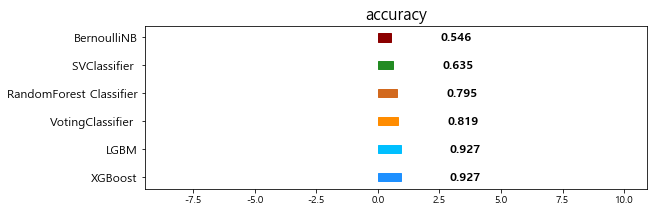

In [119]:
acc_eval('VotingClassifier ', voting_pred, Cy_test,True)

In [120]:
acc = accuracy_score(Cy_test,voting_pred)
accuracy_list.append(('VotingClassifier', acc))

In [121]:
accuracy_list

[('XGBClassifier', 0.9275),
 ('LGBMClassifier', 0.9275),
 ('BernoulliNB', 0.5465),
 ('RandomForest Classifier', 0.7955),
 ('SVClassifier', 0.635),
 ('VotingClassifier', 0.819)]

# stacking

개별 모델이 예측한 데이터를 기반으로 **final_estimator** 종합하여 예측을 수행합니다.

- 성능을 극으로 끌어올릴 때 활용하기도 합니다.
- 과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)

In [122]:
from sklearn.ensemble import StackingClassifier
rfc = model_list[1]
stack_classifier = StackingClassifier(voting_models, final_estimator=rfc, n_jobs=-1)
stack_classifier.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
stack_pred = stack_classifier.predict( CXtest_robustScaled_df)
# acc_eval('Stacking Ensemble', stack_pred, CLy_test)

In [123]:
model_list.append(stack_classifier)
model_preds.append(stack_pred)

In [124]:
acc = accuracy_score(Cy_test,stack_pred)
accuracy_list.append(('StackingClassifier', acc))

# 성능 증가시키기

In [125]:
accuracy_list

[('XGBClassifier', 0.9275),
 ('LGBMClassifier', 0.9275),
 ('BernoulliNB', 0.5465),
 ('RandomForest Classifier', 0.7955),
 ('SVClassifier', 0.635),
 ('VotingClassifier', 0.819),
 ('StackingClassifier', 0.927)]

In [126]:
hist_name = [model[0] for model in accuracy_list]
hist_acc = [model[1] for model in accuracy_list]

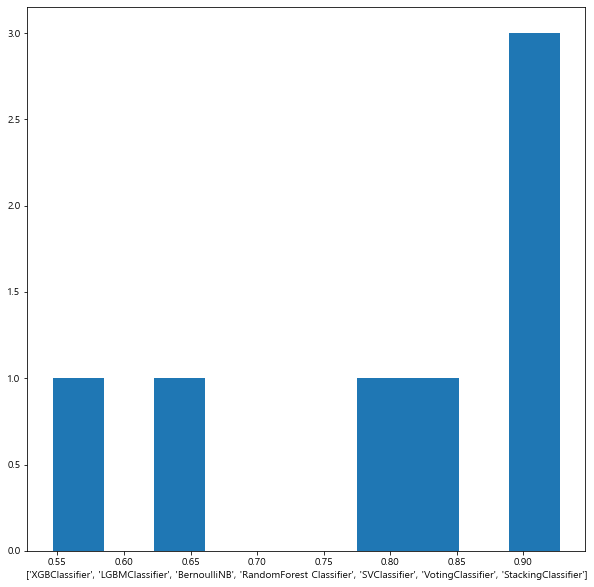

In [127]:
fig = plt.figure(figsize = (10, 10))
plt.hist(x = hist_acc)
plt.xlabel(hist_name)
plt.show()

In [ ]:
break point third

## 앙상블 - Bagging (Random Forest)

Voting VS Bagging

- Voting은 여러 알고리즘의 조합에 대한 앙상블
- Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블

# 6개의 재료 모델

In [31]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [32]:
best_prams = [['LGBMClassifier',
   {'n_estimators': 150, 'max_depth': 30}],
 ['XGBClassifier',
  {'random_state': 2,
   'nthread': 4,
   'n_estimators': 50,
   'min_child_weight': 3,
   'max_depth': 8,
   'gamma': 3,
   'colsample_bytree': 0.5,
   'colsample_bylevel': 0.9,
   'eval_metric': 'logloss'}],
 ['RandomForestClassifier',
  {'random_state' : 42,
    'max_depth': 12,
   'min_samples_leaf': 8,
   'min_samples_split': 8,
   'n_estimators': 100}]]

- 훈련되지 않은 새로운 재료 모델 (5개) 선언

In [33]:
def make_ensemble_model():
    model_list = []

    # xgb
    xgb = XGBClassifier(**best_prams[1][1])
    model_list.append(xgb)

    # lgbm
    lgbm = LGBMClassifier(**best_prams[0][1])
    model_list.append(lgbm)

    # bern
    bern = BernoulliNB()
    model_list.append(bern)

    #rfr
    rfr = RandomForestClassifier(**best_prams[2][1])
    model_list.append(rfr)

    #SVC
    svc = SVC(probability=True)
    model_list.append(svc)
    
    ensemble_list = []
    for model in model_list:
        ensemble_list.append((model.__class__.__name__, model))
    
    
    return ensemble_list

## K-fold

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [35]:
from sklearn.model_selection import KFold
n_splits = 5
kfold = KFold(n_splits=n_splits)

### Stacking Classifier

In [36]:
ensemble_models = make_ensemble_model()

- 약한 학습기가 순서대로 배치되어 속도가 느린 boosting 계열의 단점 보완 : 
    - LightGBM을 평가모델로 사용

In [37]:
rfc = LGBMClassifier(**best_prams[0][1])
stack_classifier = StackingClassifier(ensemble_models, final_estimator=rfc, n_jobs=-1)
stack_classifier.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
stack_pred = stack_classifier.predict( CXtest_robustScaled_df)

In [38]:
from sklearn.metrics import accuracy_score

In [40]:
i = 1
total_acc = 0
for train_index, test_index in kfold.split(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over):
    x_train_fold, x_valid_fold = CXtrain_ohe_robust_over[train_index], CXtrain_ohe_robust_over[test_index]
    y_train_fold, y_valid_fold = Cytrain_ohe_robust_over[train_index], Cytrain_ohe_robust_over[test_index]
    stacking_pred_fold = stack_classifier.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
#     lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
    acc= accuracy_score(stacking_pred_fold, y_valid_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, acc))
    total_acc += acc
    i+=1
print('---'*10)
print('Average Accuracy: %s' % (total_acc / n_splits))

Fold = 1, prediction score = 0.93
Fold = 2, prediction score = 0.93
Fold = 3, prediction score = 0.95
Fold = 4, prediction score = 0.99


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [44]:
train_index, test_index 

(array([    0,     1,     2, ..., 11892, 11893, 11894]),
 array([11895, 11896, 11897, ..., 14865, 14866, 14867]))

In [45]:
x_train_fold, x_valid_fold = CXtrain_ohe_robust_over[train_index], CXtrain_ohe_robust_over[test_index]
y_train_fold, y_valid_fold = Cytrain_ohe_robust_over[train_index], Cytrain_ohe_robust_over[test_index]
stacking_pred_fold = stack_classifier.fit(x_train_fold, y_train_fold).predict(x_valid_fold)

acc= accuracy_score(stacking_pred_fold, y_valid_fold)
print('Fold = {}, prediction score = {:.2f}'.format(i, acc))
total_acc += acc
i+=1
print('---'*10)
print('Average Accuracy: %s' % (total_acc / n_splits))

Fold = 5, prediction score = 1.00
------------------------------
Average Accuracy: 0.9584389747584797


In [53]:
cv_accs = []
model =stack_classifier
model.fit(CXtrain_ohe_robust_over,  Cytrain_ohe_robust_over)

StackingClassifier(estimators=[('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=0.9,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5,
                                              enable_categorical=False,
                                              eval_metric='logloss', gamma=3,
                                              gpu_id=None, importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None, max_depth=8,
                                              min_child_weight=3, missing...
                                              validate_parameters=None,
                                              verbosity=None)),
  

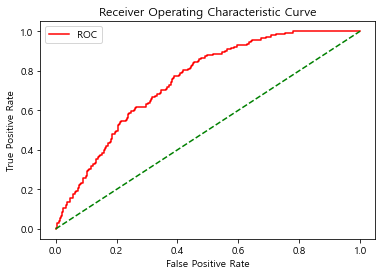

0.747534516765286


In [54]:
probs = model.predict_proba(CXtest_robustScaled_df)
prob = probs[:, 1]
fper, tper, thresholds = roc_curve(Cy_test, prob)
plot_roc_curve(fper, tper)
print(roc_auc_score(Cy_test, prob))

### Voting Classifier

In [55]:
ensemble_models = make_ensemble_model()

In [56]:
voting_Classifier = VotingClassifier(ensemble_models, n_jobs=-1,voting="soft")
voting_Classifier.fit(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over)
voting_pred = voting_Classifier.predict(CXtest_robustScaled_df)

In [57]:
i = 1
total_acc = 0
for train_index, test_index in kfold.split(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over):
    x_train_fold, x_valid_fold = CXtrain_ohe_robust_over[train_index], CXtrain_ohe_robust_over[test_index]
    y_train_fold, y_valid_fold = Cytrain_ohe_robust_over[train_index], Cytrain_ohe_robust_over[test_index]
    voting_pred_fold = voting_Classifier.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
#     lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
    acc= accuracy_score(voting_pred_fold, y_valid_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, acc))
    total_acc += acc
    i+=1
print('---'*10)
print('Average Accuracy: %s' % (total_acc / n_splits))

Fold = 1, prediction score = 0.83
Fold = 2, prediction score = 0.82
Fold = 3, prediction score = 0.89
Fold = 4, prediction score = 0.98
Fold = 5, prediction score = 0.98
------------------------------
Average Accuracy: 0.9007375050640702


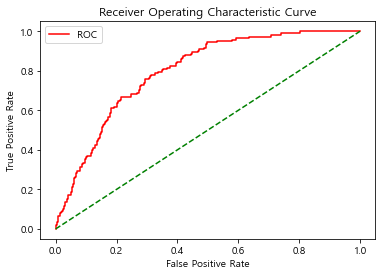

0.796279552417032


In [58]:
cv_accs = []
model =voting_Classifier
model.fit(CXtrain_ohe_robust_over,  Cytrain_ohe_robust_over)

probs = model.predict_proba(CXtest_robustScaled_df)
prob = probs[:, 1]
fper, tper, thresholds = roc_curve(Cy_test, prob)
plot_roc_curve(fper, tper)
print(roc_auc_score(Cy_test, prob))

## 5가지 모델 / 2가지 메타모델 정확도

In [ ]:
# 정확도 추가
cv_acc_list = []
for p, model in zip(model_preds,model_list):
#     acc = accuracy_score(Cy_test,p)
#     accuracy_list.append((model.__class__.__name__, acc))
    cv_acc = np.mean(cross_val_score(model, CXtest_robustScaled_df, Cy_test, cv=5))
    cv_acc_list.append((model.__class__.__name__, round(cv_acc,4)))


In [ ]:
cv_acc_list

## final model

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
final_models = [stack_classifier,voting_Classifier]

In [154]:
# final_model = LogisticRegression(C=10)
final_model = LGBMClassifier(**best_prams[0][1])

In [155]:
final_preds = []
final_probs = []
for model in final_models:
    fpred = model.predict(CXtest_robustScaled_df)
#     fprob = model.predict(CXtest_robustScaled_df)
    final_preds.append(fpred)
#     final_probs.append(fprob)

In [156]:
metamodel_preds = pd.DataFrame(final_preds).T
final_model.fit(metamodel_preds,Cy_test)
final_acc = np.mean(cross_val_score(final_model,metamodel_preds,Cy_test,cv=5))
print("최종 메타 모델의 예측 정확도 : " , final_acc )

최종 메타 모델의 예측 정확도 :  0.9295


In [157]:
from sklearn.metrics import confusion_matrix
cof_list = []

In [158]:
final = final_model.predict(metamodel_preds)

In [159]:
final_matrix = confusion_matrix(Cy_test , final)

In [160]:
final_matrix

array([[1859,    0],
       [ 141,    0]], dtype=int64)

# Confusion Matrix

In [128]:
from sklearn.metrics import plot_confusion_matrix

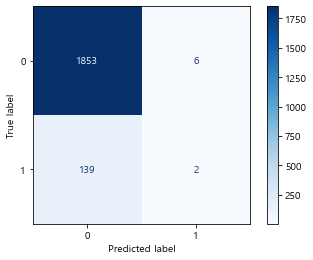

In [129]:
#XGBClassifier
plot_confusion_matrix(model_list[0],CXtest_robustScaled_df, Cy_test,cmap=plt.cm.Blues)
plt.show()

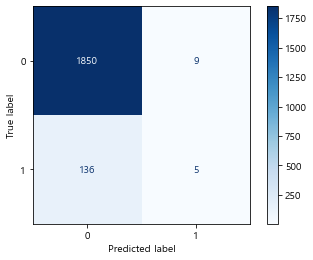

In [130]:
#LGBMClassifier
plot_confusion_matrix(model_list[1],CXtest_robustScaled_df, Cy_test,cmap=plt.cm.Blues)
plt.show()

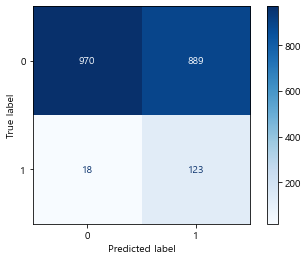

In [131]:
#BernoulliNB
plot_confusion_matrix(model_list[2],CXtest_robustScaled_df, Cy_test,cmap=plt.cm.Blues)
plt.show()

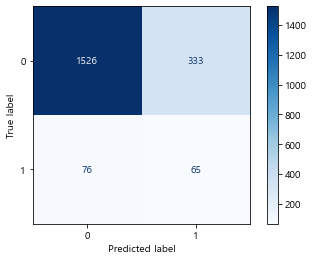

In [132]:
#RandomForestClassifier
plot_confusion_matrix(model_list[3],CXtest_robustScaled_df, Cy_test,cmap=plt.cm.Blues)
plt.show()

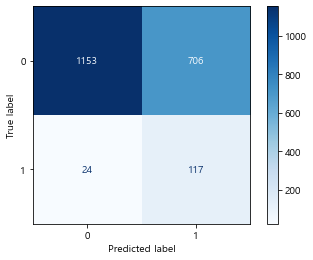

In [133]:
#SVC
plot_confusion_matrix(model_list[4],CXtest_robustScaled_df, Cy_test,cmap=plt.cm.Blues)
plt.show()

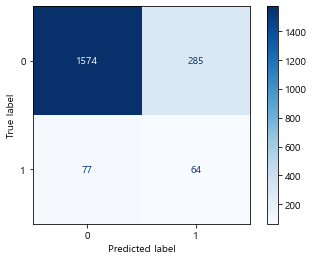

In [134]:
#VotingClassifier
plot_confusion_matrix(voting_Classifier,CXtest_robustScaled_df, Cy_test,cmap=plt.cm.Blues)
plt.show()

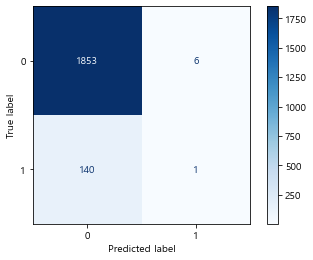

In [75]:
#StackingClassifier
plot_confusion_matrix(stack_classifier,CXtest_robustScaled_df, Cy_test,cmap=plt.cm.Blues)
plt.show()

5가지 모델
- XGBClassifier
- LGBMClassifier
- BernoulliNB
- RandomForestClassifier
- SVC

2가지의 메타모델
- VotingClassifier
- StackingClassifier

최종 모델
- finalClassifier

## final model 5-교차검증 정확도

In [ ]:
i = 1
total_acc = 0
for train_index, test_index in kfold.split(CXtrain_ohe_robust_over,Cytrain_ohe_robust_over):
    x_train_fold, x_valid_fold = CXtrain_ohe_robust_over[train_index], CXtrain_ohe_robust_over[test_index]
    y_train_fold, y_valid_fold = Cytrain_ohe_robust_over[train_index], Cytrain_ohe_robust_over[test_index]
    final_pred_fold = lr_final.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
#     lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
    acc= accuracy_score(final_pred_fold, y_valid_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, acc))
    total_acc += acc
    i+=1
print('---'*10)
print('Average Accuracy: %s' % (total_acc / n_splits))

### RandomForestClassifier

In [136]:
type(CXtrain_ohe_robust_over)

numpy.ndarray

In [137]:
CXtrain_ohe_robust_over_df = pd.DataFrame(CXtrain_ohe_robust_over,columns = CX_test.columns)

In [ ]:
# CXtrain_ohe_robust_over[["T_AGE", "T_BMI", "T_INCOME"]], CXtest_robustScaled_df[["T_AGE", "T_BMI", "T_INCOME"]], Cytrain_ohe_robust_over, Cy_test

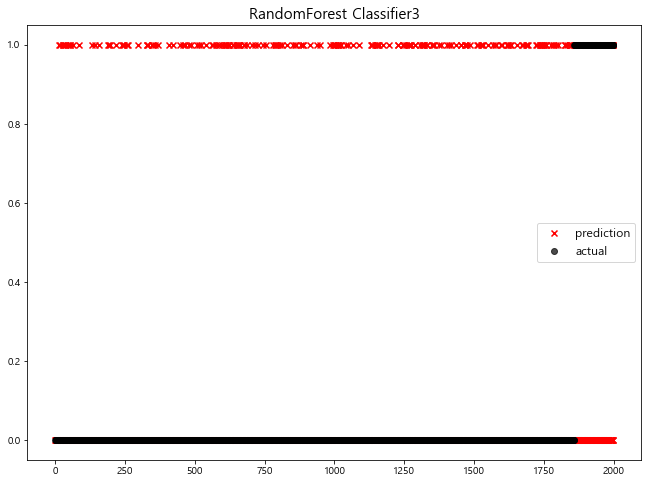

                      model  accuracy
0                   XGBoost    0.9275
1                      LGBM    0.9275
2   RandomForest Classifier    0.8535
3  RandomForest Classifier3    0.8535
4         VotingClassifier     0.8190
5             SVClassifier     0.6350
6               BernoulliNB    0.5465


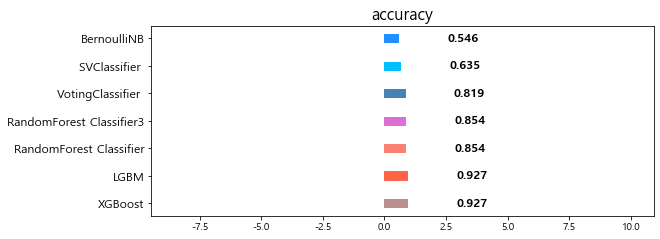

In [161]:
rfr3 = RandomForestClassifier(**best_prams[2][1])
rfr3.fit(CXtrain_ohe_robust_over_df[["T_AGE", "T_BMI", "T_INCOME"]],Cytrain_ohe_robust_over)
rfr_pred3 = rfr3.predict(CXtest_robustScaled_df[["T_AGE", "T_BMI", "T_INCOME"]])
acc_eval('RandomForest Classifier3', rfr_pred3, Cy_test,True)

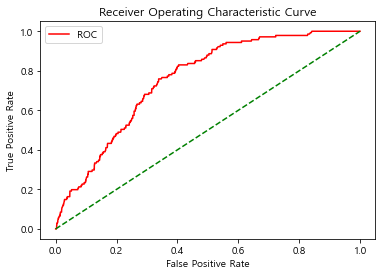

In [163]:
model =rfr3
# model.fit(CXtrain_ohe_robust_over_df[["T_AGE", "T_BMI", "T_INCOME"]],Cytrain_ohe_robust_over)

probs = model.predict_proba(CXtest_robustScaled_df[["T_AGE", "T_BMI", "T_INCOME"]])
prob = probs[:, 1]
fper, tper, thresholds = roc_curve(Cy_test, prob)
plot_roc_curve(fper, tper)

In [164]:
roc_auc_score(Cy_test, prob)

0.7548746943182295

In [145]:
final_acc = np.mean(cross_val_score(model,CXtest_robustScaled_df[["T_AGE", "T_BMI", "T_INCOME"]],Cy_test,cv=5))
print("변수 3개 선택 모델의 예측 정확도 : " , final_acc )

변수 3개 선택 모델의 예측 정확도 :  0.9295


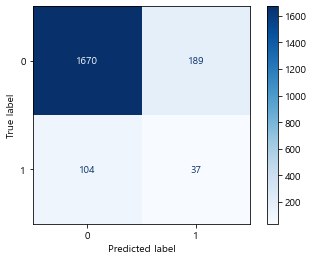

In [146]:
plot_confusion_matrix(rfr3,CXtest_robustScaled_df[["T_AGE", "T_BMI", "T_INCOME"]], Cy_test,cmap=plt.cm.Blues)
plt.show()

# 결과 해석

술과 술에 첨가된 물질에 의해 당을 섭취하기 쉽다는 사실은 이미 알려져 있다.
설문에서도 술과 관련되어 아주 상세한 설문 문항이 있다. 
국립 보건원에서 이미 데이터로 검증하여 선정된 문항
하지만 변수의 중요도가 낮게 평가 됐다.
병원에서 물어보면 실제보다 낮춰서 쓰는 경향이 있기 떄문이다.


또한 높은 자기 객관성과 기억력이 필요하다.
그래서 객관적인 수치인 임상조사와 키, 몸무게, 수입 등의 영향력이 크게 평가되었을 것이다. 
인터넷이나 앱으로 배포되어 병원에 가기 전 간단하게 자가 검진 할 수 있는 용도로 사용 될 수 있다.
또한 온라인으로 설문을 받아서, 온라인으로 옮기는 추가적인 단계가 불필요해서,
데이터 수집 수단으로도 유용하게 사용 될 것으로 기대된다.